# The data intepreter

This Jupyter notebook will load and interpret our scraped data. These data contain information about games that digital platform Steam has to offer. We believe that gaming market becomes more and more significant part of economy, and according to that we should pay proportionate attention to it. We will mainly focus on inspecting distribution of release dates of these games throughout years and months. We will derive how much are numbers of released games growing across years and also in which months are games mostly released. We will put these numbers into context of sales, prices and ratings. This can help us to make general assumptions about evolution of quality of games. We will also focus on current sales, from which we will be able to see what kind of games are currently on sale. All this can provide us with deeper insight into functioning of gaming market in recent 20 or so years.

Firstly, we will import pandas package in order to load and save our data as pandas dataframe.

In [1]:
import pandas as pd

Our data are ordered by share of positive reviews. Let's take a look at them:

In [2]:
data = pd.read_csv('steam_global_sellers_by_reviews',  index_col = 0, parse_dates=["Release date"],date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
data

,Title,Release date,Share of positive reviews (in %),Total number of reviews,Normal price (€),Discounted price if there is a sale (€),Sale rate (in %)
0,The Witcher 3: Wild Hunt - Expansion Pass,2015-05-19,99,3351,24.99,NaN,NaN
1,Senren＊Banka,2020-02-14,99,2854,29.99,NaN,NaN
2,A Short Hike,2019-07-30,99,2757,6.59,NaN,NaN
3,Aseprite,2016-02-22,99,2751,14.99,NaN,NaN
4,Doki Doki Literature Club Fan Pack,2017-09-22,99,1498,9.99,NaN,NaN
...,...,...,...,...,...,...,...
14473,Men of War: Assault Squad 2 - Cold War,2019-09-12,17,539,21.99,NaN,NaN
14474,Far Cry® 5 - Dead Living Zombies,2018-08-28,17,585,7.99,3.99,50.0
14475,Command &amp; Conquer 4: Tiberian Twilight,2010-03-16,17,2340,19.99,NaN,NaN
14476,Tom Clancy's Ghost Recon® Wildlands - Narco Road,2017-04-25,16,501,14.99,NaN,NaN


mozna doplnit nejaky pindy

Now we will import necessary tools for data processing:

In [3]:
import requests
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

We will start by introduction to our data and basic evaluation. In order to do that we will import class "Summary" from our Data processor. This class contains... . We begin by using attribute for the most basic summarization of price/sale variables in the data.

In [4]:
from Data_processor_py import Summary
dfs = Summary(data)
dfs.basic_summary()

Basic summary: 
The number of items on sale from the first 580 pages is 1764.
The mean discount is 56.0%.
The average price before sale is 20.64€, with the average price after sale being 9.44€.
The average number of reviews on a game from the first 580 pages is 4397.0.


{None}

## Prices

This provides us with very limited view. However, we can take a look at histogram of prices. Distribution of prices before discount tells us only that normally, games mostly cost under 22€. On the other hand, histogram of discounted prices seems similar to Poisson distribution. Also, both histograms seem roughly similar and from their lefs-side we can see, that most frequent games are from price level of below 3€.

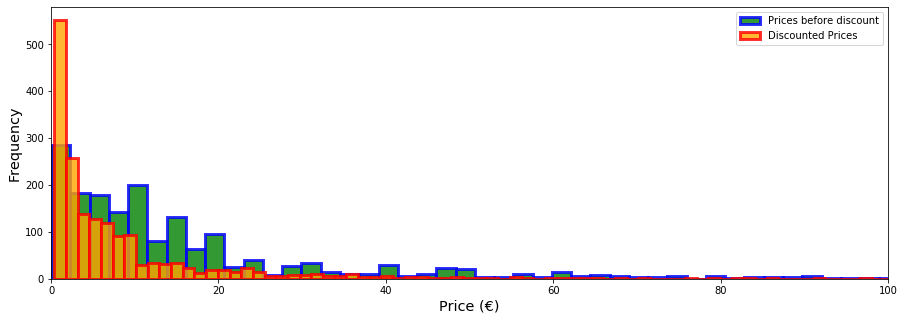

(None, None)

In [5]:
dfs.price_hist()

## Dates of release - years and months

Let's focus for now on release dates of the games. It is reasonable to assume that numbers of released games are growing each year. If we take a look at graph of Number of games released by Year, it might seem that the pace of releasing new games has become quite stable since 2013. Here it is important to point out that in our dataset DLC bundles and alone DLCs are not distinguished from regular games, because not all DLCs are marked as DLC and it would require closer manual inspection of every individual observation in order to distinguish it. We assume that number of released DLCs has become inproportionately higher to number of released games in last fifteen or so years. All this leads us to conclusion that our histogram is in fact rather flatter than depicted.

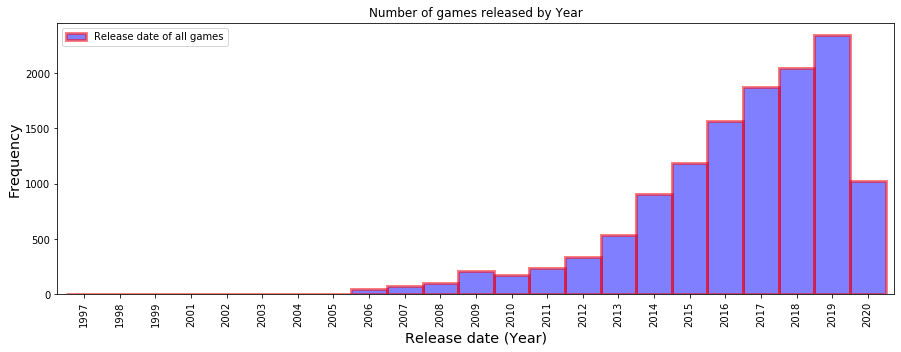

(None, None)

In [6]:
dfs.release_hist_total_year()

We can also look at games on sale in context of release year. As we can see, the graph below more or less copies the graph above, which we do not consider quite surprising.

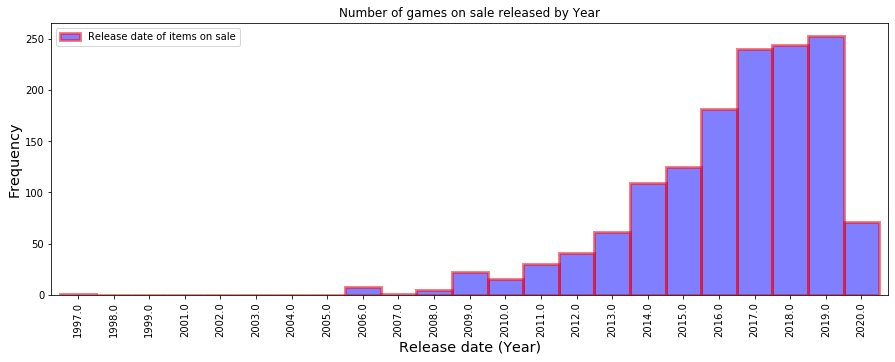

(None, None)

In [7]:
dfs.release_hist_sale_year()

Up until now, we focused on years only. We created anallogical histograms for months (graphs below). Numbers of released games by months make sense as both most (in)famous Steam sales (Christmas sale and Steam Summer sale) fit perfectly into an increase in months before Christmas and then another increase again after six months. Both plummets come right after these sales. That makes sense, as in those times consumers are saturated with games and are less likely to buy. The second one follows the first one's shape, which shows that the month of release does not have a major impact on whether the game will be discounted or not.

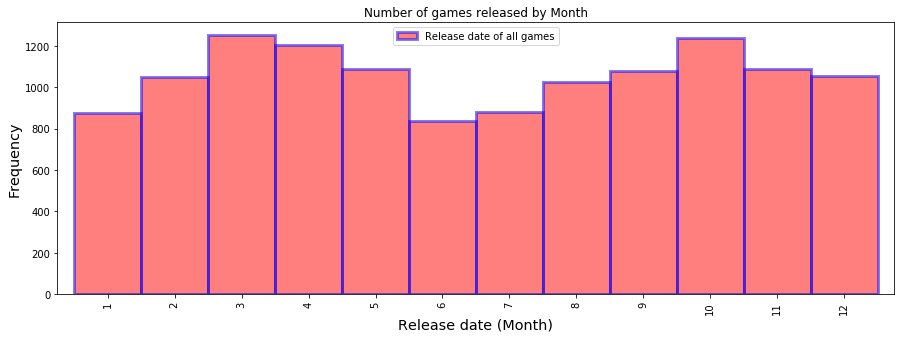

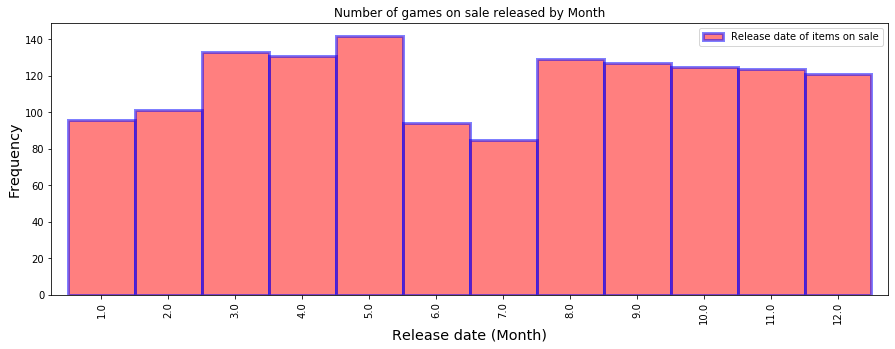

(None, None)

In [8]:
dfs.release_hist_total_month()
dfs.release_hist_sale_month()

New information can be provided to us by seeing frequency of game release in context of both years and months at the same time. In graph below 10 colors stand from years 2010 to 2019 and each of 12 segments stands for one month. We decided to exclude 2020 due to the fact that this year is not over and in given current circumstances, it is special. Also, we excluded years up to 2010, as we are interested in recent history, when gaming digital platforms became mainstream.

This histograms only confirms all previous histograms. We can see that especially the increases in recent years are ever more rapid than ever. As more and more people use the services of digital platforms due to their accessibility, more and more game developers see this as an opportunity for profit. In contrast with that, January and summer months behave in the opposite way.

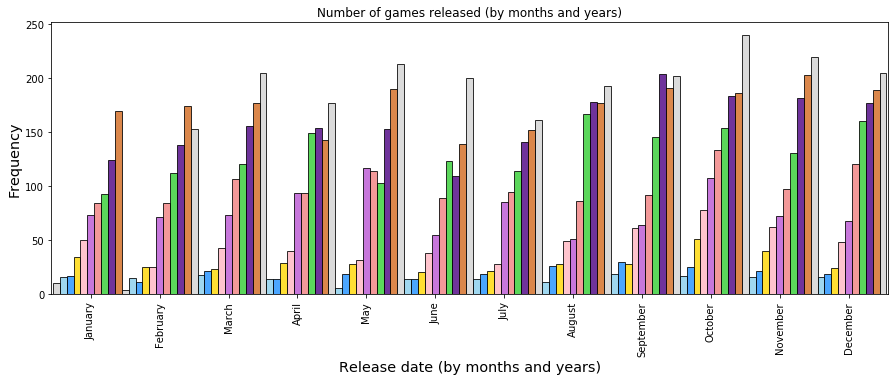

(None, None)

In [9]:
dfs.release_multiple_hist()

Now, we will import another class from our Data processor. "Summary_time" gives us the data which our previous graphs were based on as pandas dataframe. In addition, it provides us with some new information about game quality. While critics can provide deeper insight into evaluation of game quality, we believe that game quality is truly reflected in its ratings by consumers.

In [12]:
from Data_processor_py import Summary_time
dfst = Summary_time(data)

We will now for a moment delve deeper into ratings and quality, despite that they will be our main topics later. Average game ratings throughout years can provides us with information about change in overall quality of released games. If we focus on years since 2006 (up to 2006 there is not enough games in offer to make even general conclusions) we can see that quality of released games has slightly decreased and from 2009 is quite stable. We believe that this degree can be attributed to survivorship bias, as lower quality games from this era did not even make it to Steam offer retrospectively. Thus, average quality of games due to these years is higher. Also (but this might be more 1990s thing than 2000s) it is possible that due to lower amount of consumers on the market, released games needed to have higher quality in order to become successful.

We can as well notice that rate of average discount is lower in recent years.

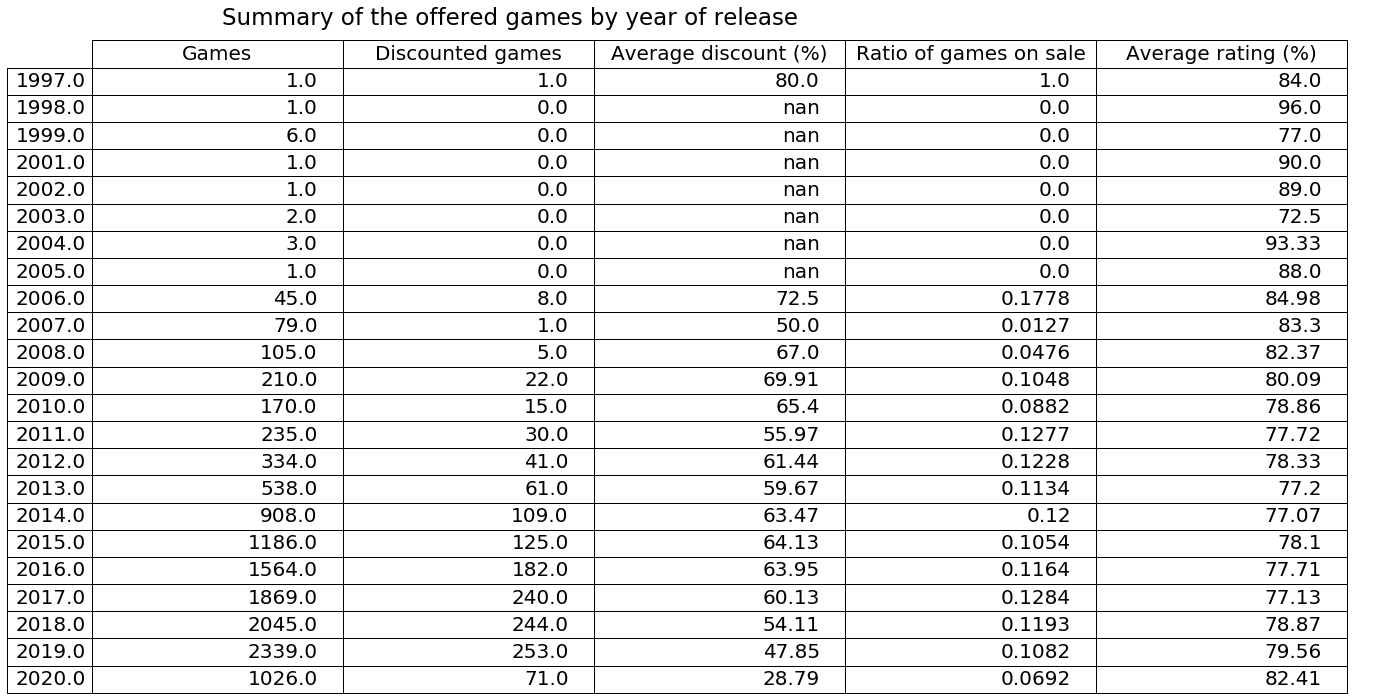

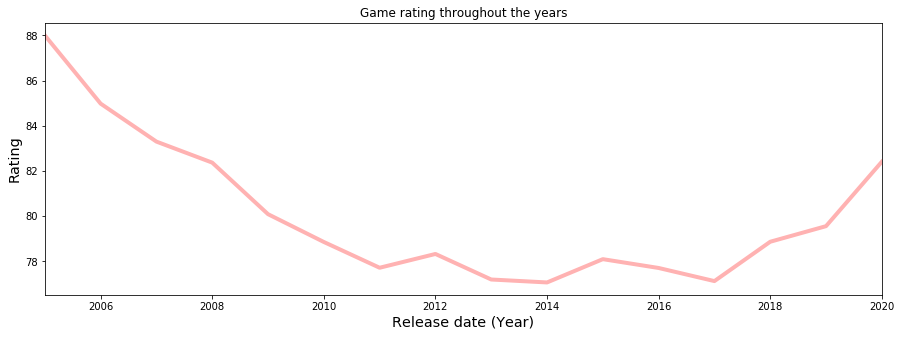

(None, None)

In [19]:
dfst.release_tab_year()
dfst.average_rating_year()

We can check the same table ordered by months of release. As expected, in our variables are no significant swings except for number games, where again we can see the impact Steam Christmas and Summer sales.

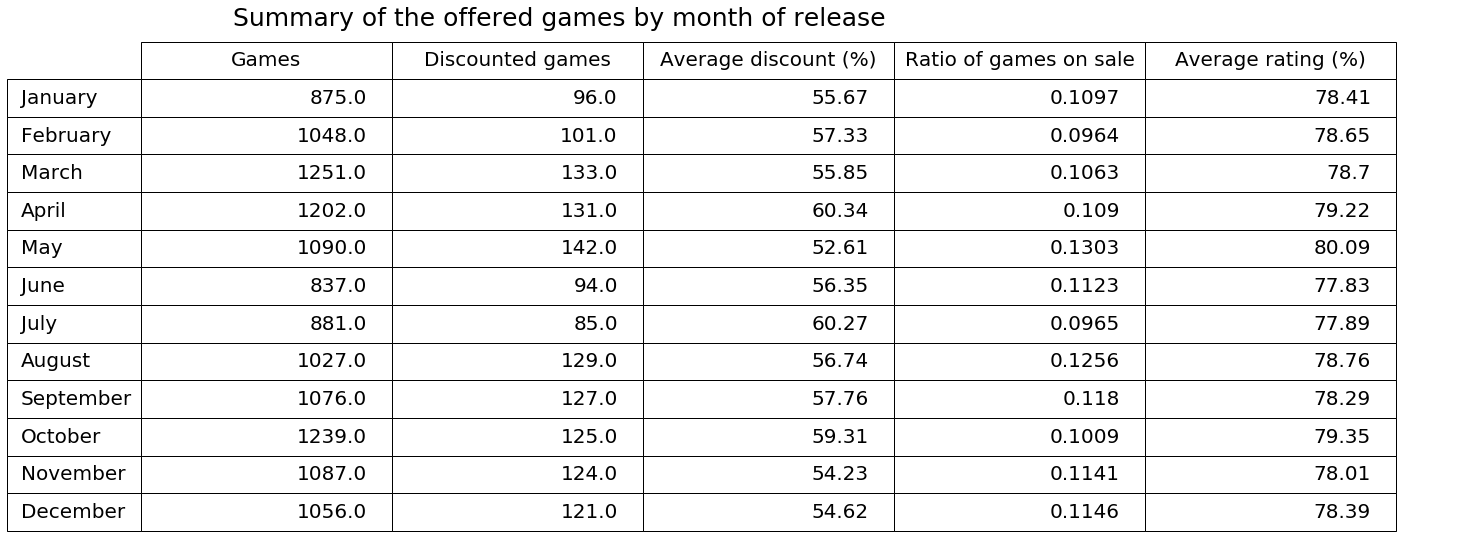

(None, None)

In [20]:
dfst.release_tab_month()

## Game ratings, reviews and quality

While evolution of gaming market and games during time is interesting, let's shift our focus to game quality. For that we import yet another class. "Summary ratings" class contains data evaluating attributes revolving around game ratings.

In [22]:
from Data_processor_py import Summary_ratings
dfsr = Summary_ratings(data)

The summary for each rating is shown in the table bellow, however we will be showing some of the more important trends in following graphs.

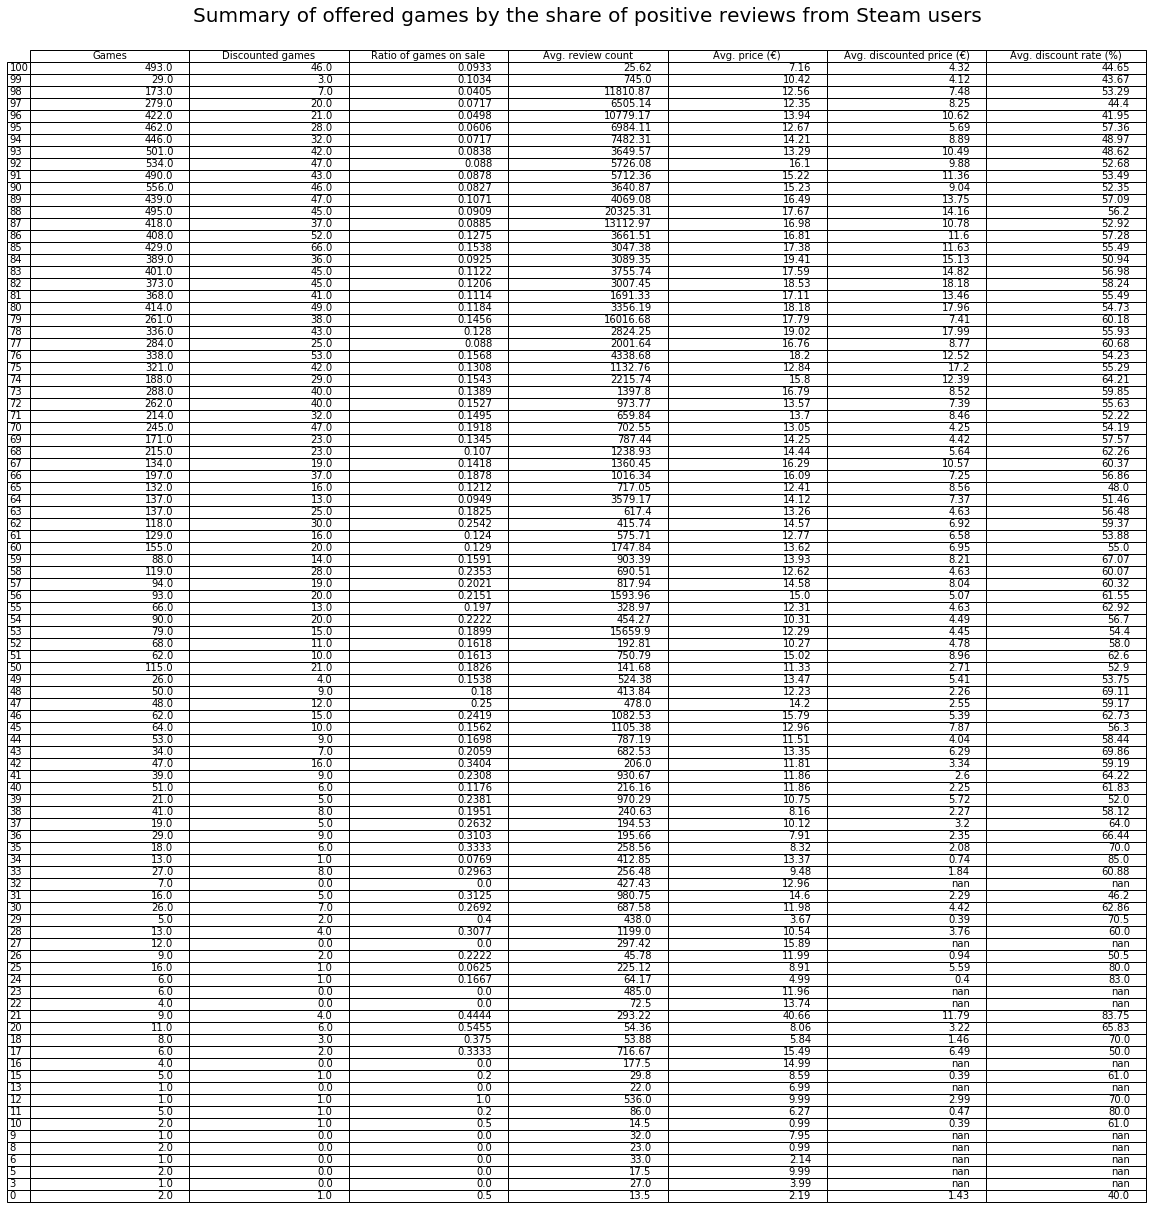

In [26]:
dfsr.summary_table()

Graph below shows ratio of games on sale based on their rating. We can see, that with increasing rating there is slightly decreasing trend. That makes sense, as in general high rated games tend to not need to be discounted in order to be sold. We can see that especially average and low rated games are discounted for the purpose of increasing profits in the long run. Also, on one hand can be quite surprising that lowest-rated games are not discounted at all. On the other hand, the reason for that might be that developers do not want to attract attention to the fact that this rubbish even exists. Also note that there is not a huge quantity of games with extremely bad ratings.

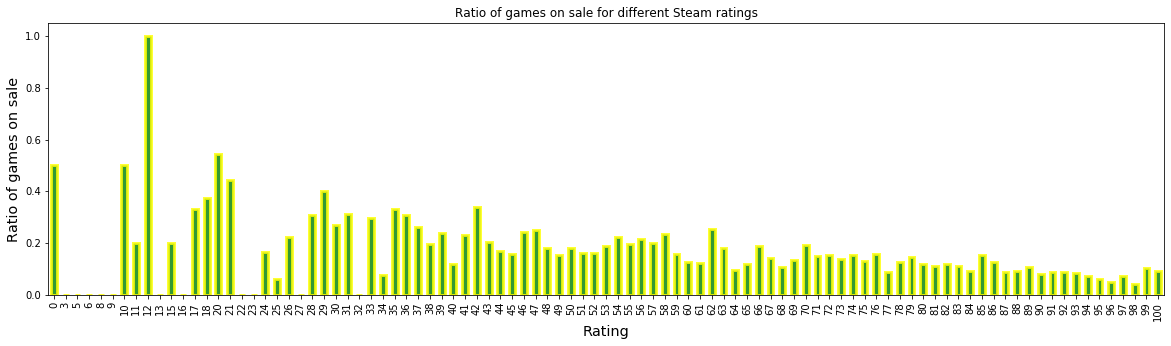

(None, None)

In [23]:
dfsr.sale_ratio_hist()

This and previous histogram perfectly fill each other. This histogram again shows with rising rate of positive reviews, average discount becomes lower, because "better games sell themselves".

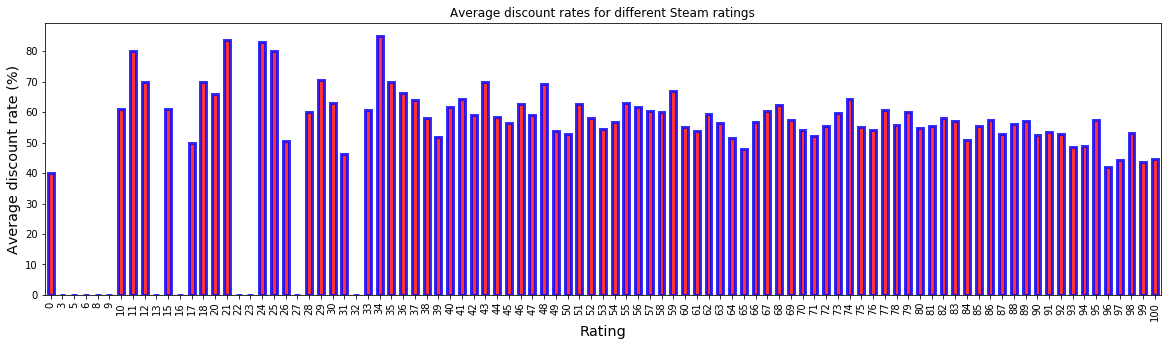

(None, None)

In [17]:
dfsr.average_discount_hist()

To support the findings in the graph displaying the ratio of games on sale, the number of games per rating is shown bellow. The number of games per rating decreases once a high rating is reached but the data suggest there is a lot of games with a 100% share of positive reviews.

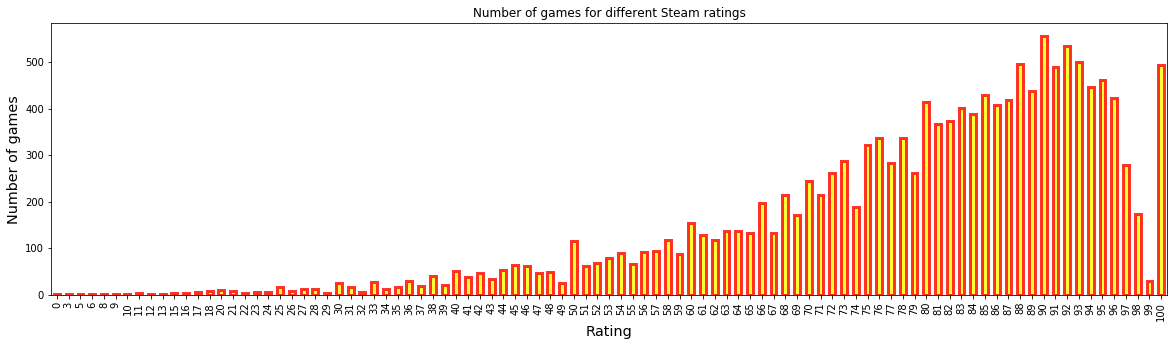

(None, None)

In [25]:
dfsr.n_of_games()